## DEFINE THE GOAL

More Purshase?

## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt

#### FIRST VISIT DATASET

In [2]:
# FIRST_DATASET

def first_dataset():
    
    columns_name = ['date', 'event_type', 'marketing_channel', 'unique_visitor', 'continent', 'device_type', 'browser_type']

    first_visit_df = pd.read_csv('Desktop/jds/first_visit.csv', sep=';', names=columns_name)

    category = ['marketing_channel', 'continent', 'device_type', 'browser_type']  #create de list within the column 

    first_visit_df[category] = first_visit_df[category].astype('category') #convert de list to category dtype

    first_visit_df['date'] = pd.to_datetime(first_visit_df['date']) # convert the coluns date to datetime

    return first_visit_df


# RETURNING VISIT DATASET

def returning_dataset(): 
    
    columns_name = ['date', 'event_type', 'marketing_channel', 'unique_visitor', 'continent', 'device_type', 'browser_type']
    returning_visit_df = pd.read_csv('Desktop/jds/returning_visit.csv', sep=';', names = columns_name)
    
    # convert the column date to datetime
    returning_visit_df['date'] = pd.to_datetime(returning_visit_df['date'])
    
    return returning_visit_df


# PURCHASE_DATASET

def purchase_dataset():   
    columns_name = ['date', 'event_type', 'empty_column', 'unique_visitor', 'size_of_the_buy', 'quantity', 'browser_type']
    purchase_df = pd.read_csv('Desktop/jds/purchase.csv', sep=';', names=columns_name)


    category = ['size_of_the_buy']  #create de list within the column 

    purchase_df['size_of_the_buy'] = purchase_df['size_of_the_buy'].astype('category') #convert de list to category dtype
    
    purchase_df['date'] = pd.to_datetime(purchase_df['date'])


    # drop  the columns empty_column and browser_type
    purchase_df.drop(['empty_column', 'browser_type'], axis=1, inplace=True)
    
    return purchase_df

Let's distinct returning users for funnel analysis!

In [4]:
returning_distinct = returning_dataset().drop_duplicates(subset = 'unique_visitor', keep= 'first')
returning_distinct.head()

,date,event_type,marketing_channel,unique_visitor,continent,device_type,browser_type
0,2019-02-01 04:23:50,returning_visit,Facebook,100000119,Asia,tablet,other
1,2019-02-01 04:49:42,returning_visit,Facebook,100000040,Asia,desktop,chrome
2,2019-02-01 05:27:54,returning_visit,Facebook,100000030,Asia,desktop,firefox
3,2019-02-01 05:29:09,returning_visit,Facebook,100000270,Asia,desktop,other
5,2019-02-01 05:58:33,returning_visit,Facebook,100000038,Asia,desktop,chrome


#### BRINGING EVERTHING INTO ONE BIG TABLE

In [42]:
funnel = first_dataset().merge( # merge returning visits to first visits
                            returning_distinct, 
                            how = 'left', 
                            left_on='unique_visitor',
                            right_on='unique_visitor').merge( #merge purchases to ther previous merged dataframe
                            purchase_dataset(),
                            how = 'left',
                            left_on = 'unique_visitor',
                            right_on = 'unique_visitor')

funnel['date1'] = funnel['date_x'].astype('str').str.split(' ').str[0]
funnel['time'] = funnel['date_x'].astype('str').str.split(' ').str[1]

####    FUNNELS & TRENDS

FUNNEL ANALYSIS

GENERAL FUNNEL

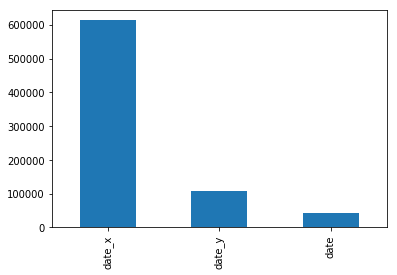

In [44]:
# How many first_visit, returning en purchase?
funnel.count()[['date_x', 'date_y', 'date']].plot(kind='bar')

###### FUNNELS BY SEGMENTS

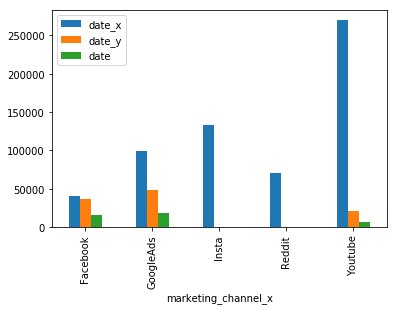

In [8]:
funnel.groupby('marketing_channel_x').count()[['date_x', 'date_y', 'date']].plot(kind='bar')

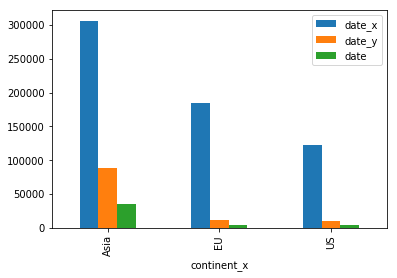

In [9]:
funnel.groupby('continent_x').count()[['date_x', 'date_y', 'date']].plot(kind='bar')

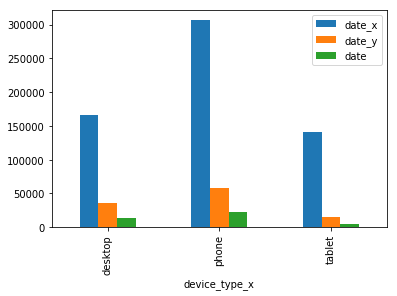

In [10]:
funnel.groupby('device_type_x').count()[['date_x', 'date_y', 'date']].plot(kind='bar')

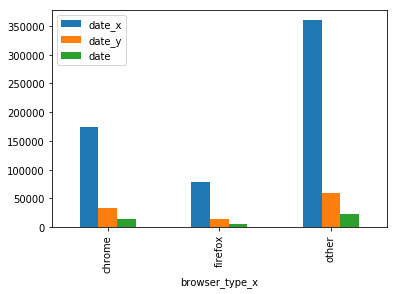

In [11]:
funnel.groupby('browser_type_x').count()[['date_x', 'date_y', 'date']].plot(kind='bar')

#### WORTH TO CHECK: PURCHASED AMOUNTS BY SEGEMENT

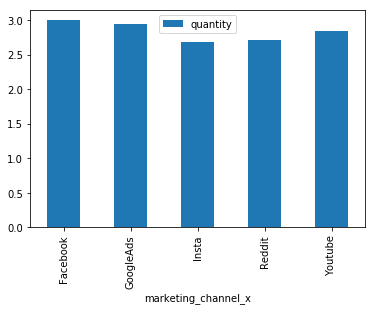

In [19]:
funnel.groupby('marketing_channel_x').mean()[['quantity']].plot(kind='bar')

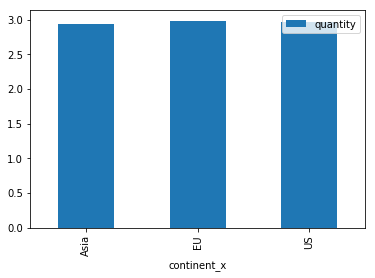

In [20]:
funnel.groupby('continent_x').mean()[['quantity']].plot(kind='bar')

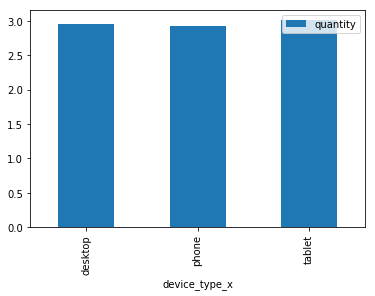

In [23]:
funnel.groupby('device_type_x').mean()[['quantity']].plot(kind='bar')

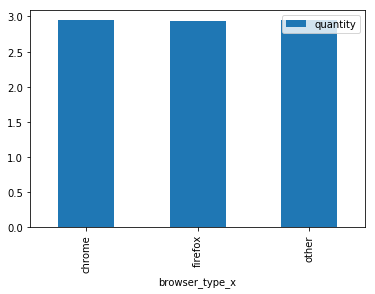

In [25]:
funnel.groupby('browser_type_x').mean()[['quantity']].plot(kind='bar')

###### TRENDS PER SEGMENTS

###### GENERAL FIRST VISITS TREND

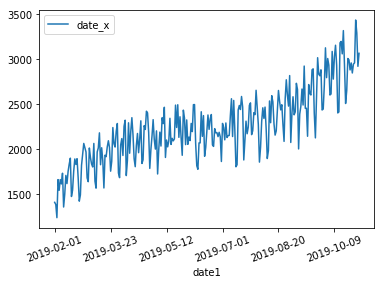

In [56]:
funnel.groupby('date1').count()[['date_x']].plot(kind='line', rot=20)

###### GENERAL PURCHASE TREND

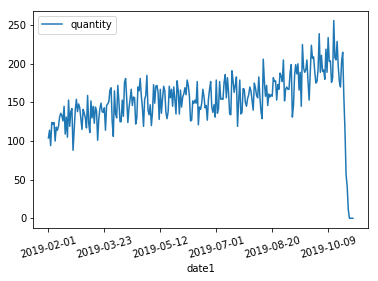

In [60]:
funnel.groupby('date1').count()[['quantity']].plot(kind='line', rot=15)

###### GENERAL PURCHASE TREND (HOW MANY PRODUCTS DID THEY BUY?)

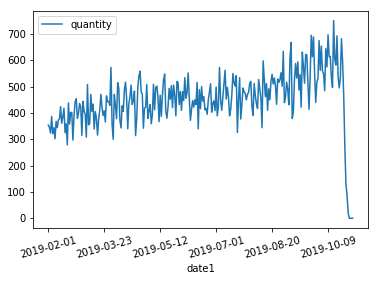

In [64]:
funnel.groupby('date1').sum()[['quantity']].plot(kind='line', rot=15)

###### FIRST VISIT TREND BY CHANNEL

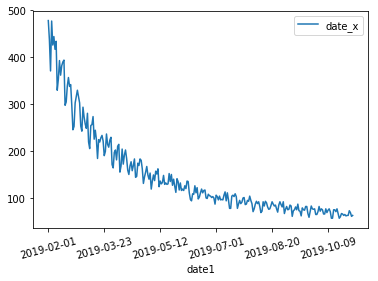

In [81]:
funnel[funnel['marketing_channel_x'] == 'Facebook'].groupby(['date1']).count()[['date_x']].plot(kind='line', rot=15)

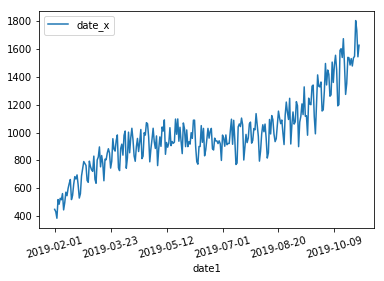

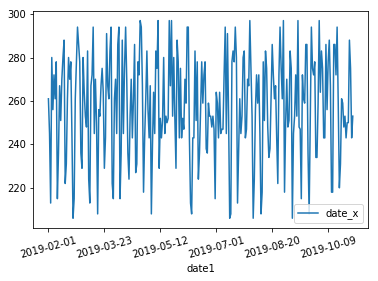

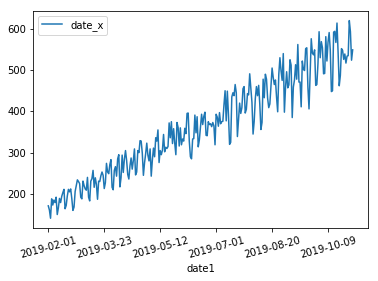

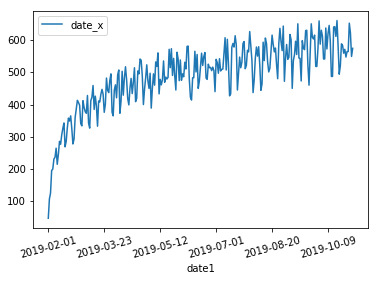

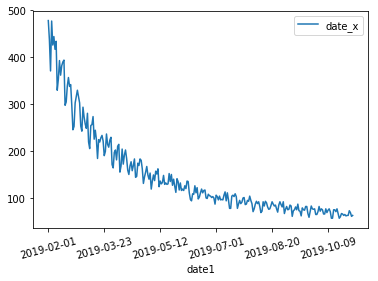

In [79]:
channels = ['Youtube', 'Reddit', 'GoogleAds', 'Insta', 'Facebook']

for i in channels:
    funnel[funnel['marketing_channel_x'] == i].groupby(['date1']).count()[['date_x']].plot(kind='line', rot=15)

###### PURCHASE TREND BY CHANNEL

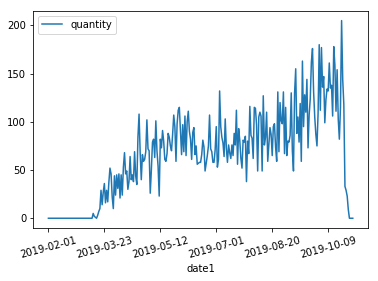

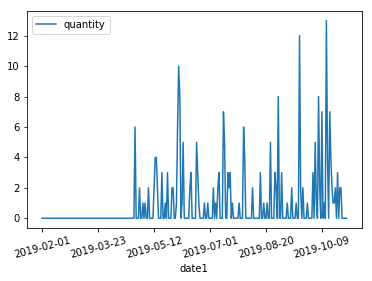

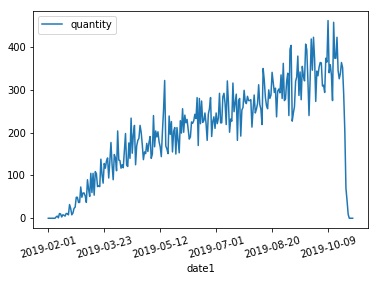

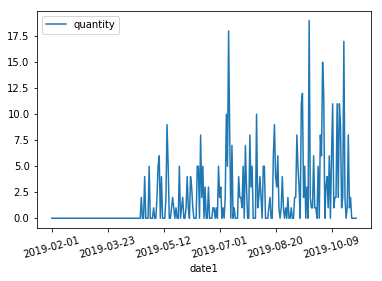

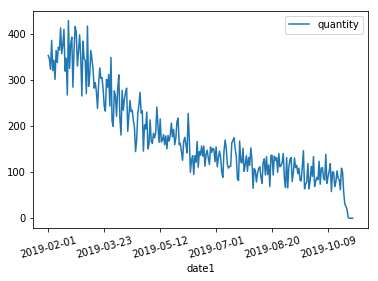

In [84]:
channels = ['Youtube', 'Reddit', 'GoogleAds', 'Insta', 'Facebook']

for i in channels:
    funnel[funnel['marketing_channel_x'] == i].groupby(['date1']).sum()[['quantity']].plot(kind='line', rot=15)

###### FIRST VIST TREND BY CONTINENT

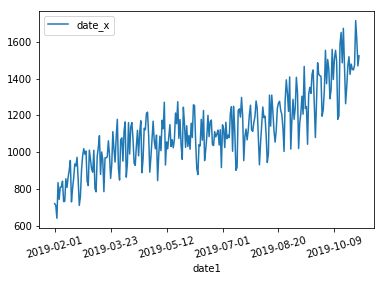

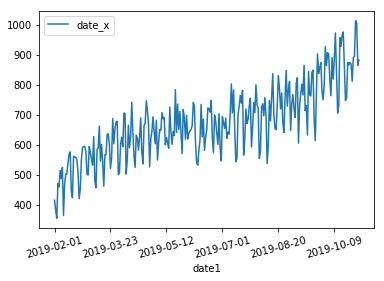

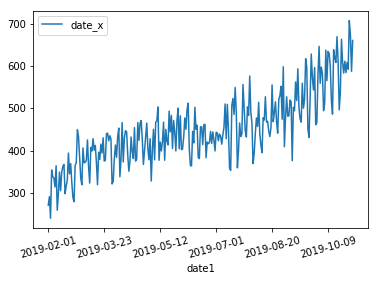

In [87]:
continents = ['Asia', 'EU', 'US']
for i in continents:
    funnel[funnel['continent_x'] == i].groupby(['date1']).count()[['date_x']].plot(kind='line', rot=15)

###### PURCHASE BY CONTINENT

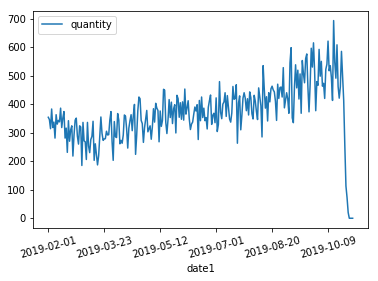

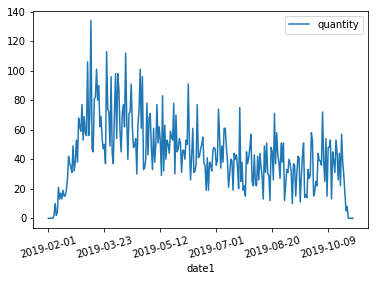

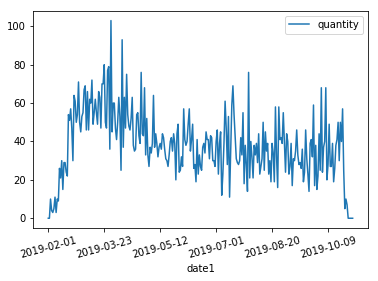

In [89]:
continents = ['Asia', 'EU', 'US']
for i in continents:
    funnel[funnel['continent_x'] == i].groupby(['date1']).sum()[['quantity']].plot(kind='line', rot=15)

###### PURCHASE BY DEVICE TYPE

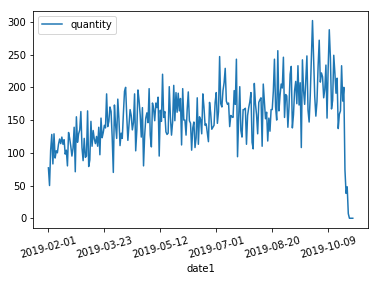

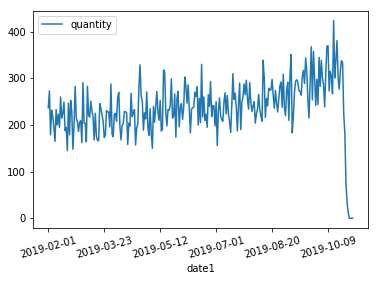

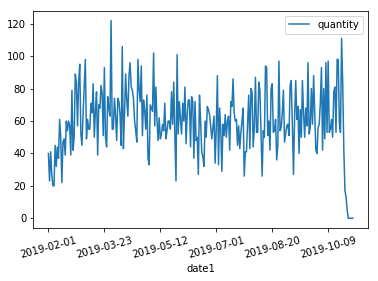

In [91]:
continents = ['desktop', 'phone', 'tablet']
for i in continents:
    funnel[funnel['device_type_x'] == i].groupby(['date1']).sum()[['quantity']].plot(kind='line', rot=15)

###### PURCHASE BY BROWSER TYPE

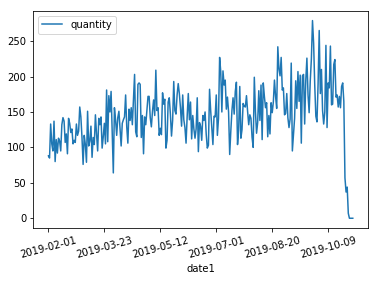

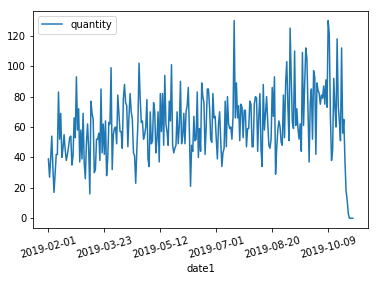

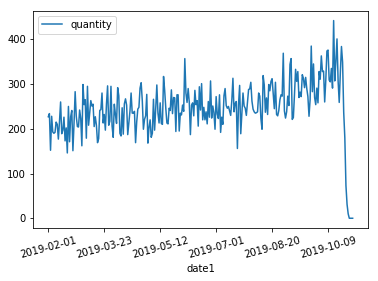

In [92]:
continents = ['chrome', 'firefox', 'other']
for i in continents:
    funnel[funnel['browser_type_x'] == i].groupby(['date1']).sum()[['quantity']].plot(kind='line', rot=15)

###### HUNCH: DOES RETENTION RATE CORRELATION WITH PURCHASE RATE

In [99]:
ret_count = returning_dataset().groupby('unique_visitor').count()[['date']]
buyers = purchase_dataset()[['unique_visitor']]
buyers['conv'] = 1

In [101]:
ret_count

,date
unique_visitor,
100000000,5
100000005,5
100000011,1
100000025,3
100000029,2
...,...
100612835,1
100612849,1
100612856,1


In [108]:
merged_table = ret_count.merge(buyers, 
                               how = 'left', 
                               left_on = 'unique_visitor', 
                               right_on = 'unique_visitor')

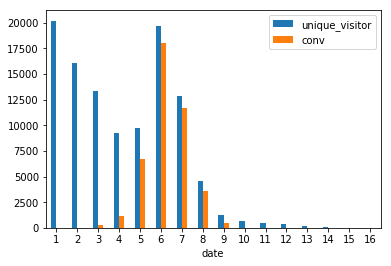

In [117]:
merged_table.groupby('date').count().plot(kind='bar', rot=0)

In [119]:
merged_table.fillna(0)[['date', 'conv']].corr()

,date,conv
date,1.000000,0.657913
conv,0.657913,1.000000


###### KEY-FINDINGS

###### There is a significant conversion rate difference in the different marketing channels

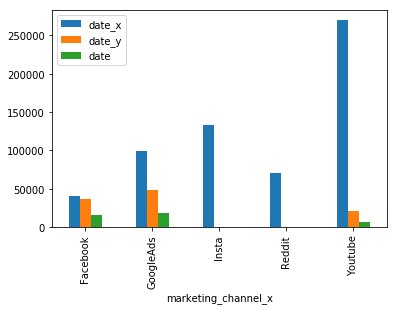

In [123]:
funnel.groupby('marketing_channel_x').count()[['date_x', 'date_y', 'date']].plot(kind='bar')

###### Some difference if we take a look at continents

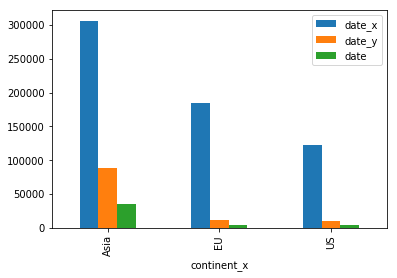

In [124]:
funnel.groupby('continent_x').count()[['date_x', 'date_y', 'date']].plot(kind='bar')

###### The key channels are: Youtube, Google Ads and Facebook

- Fecebook is the best converting channel but has a strong downward trend

- Youtube's conversion is not goed, but the channels isgrowing

- GoogleAds has a goed enough conversion rate and sustainble grouth, too

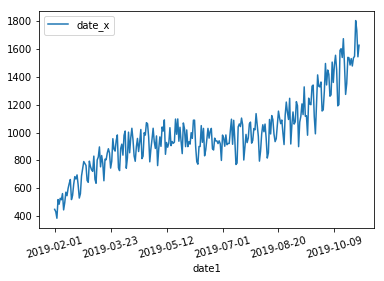

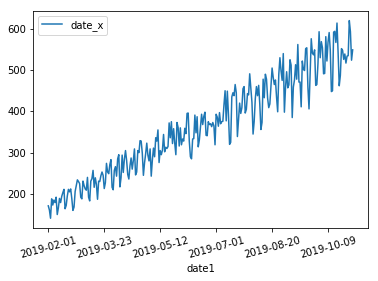

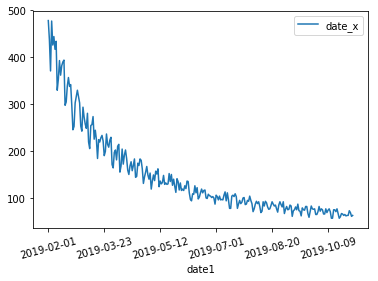

In [125]:
channels = ['Youtube', 'GoogleAds', 'Facebook']

for i in channels:
    funnel[funnel['marketing_channel_x'] == i].groupby(['date1']).count()[['date_x']].plot(kind='line', rot=15)

###### Retention rate seems to ben important

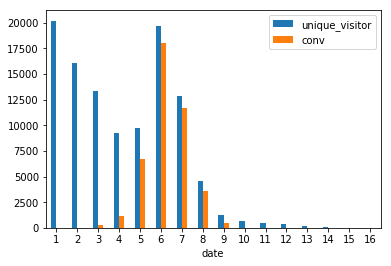

In [126]:
merged_table.groupby('date').count().plot(kind='bar', rot=0)

###### CONCLUSIONS:
    
1) Focus on Google Ads for new users (good conv%, growing channel)

2) Google Ads should learn from Facebook --> whta works there for conversation and retention?

3) Experment with remarketing --> returning users buy with a higher % (though mind correlation-caausation!)
